In [27]:
import pandas as pd
def print_df(df):
  total_rows = df.shape[0]
  dataframe_info = df.info()
  dataframe_description = df.describe()
  print(total_rows)
  print(dataframe_info)


In [25]:
import pandas as pd

# Read the smaller CSV file
smaller_file_path = '/content/drive/MyDrive/chagas/lab_result.csv'
diagnosis = pd.read_csv(smaller_file_path)
# Display the first few rows of the smaller file
print("First 5 rows of the CSV file:")
print(diagnosis.head())


# Find the unique values in 'lab_result_text_val' and count their occurrences
unique_values_count = diagnosis['code'].value_counts()
# Display the unique values and their counts
print(unique_values_count)
# Extract unique codes from the 'code' column
unique_codes = diagnosis['code'].unique()

# List of codes to check
codes_to_check = [
    '57320-4', '60553-5', '32725-4',
     '23785-9', '10729-2', '23533-3'
]

#LOINC 59387-1, LOINC 14094-7, LOINC 13291-0, LOINC 13290-2

# Check if each code is present in the unique codes
for code in codes_to_check:
    if code in unique_codes:
        print(f"Code {code} is present.")
    else:
        print(f"Code {code} is NOT present.")



# Filter the rows where the 'code' column matches any of the codes_to_check
filtered_df = diagnosis[diagnosis['code'].isin(codes_to_check)]

# Save the filtered DataFrame to a new CSV file
filtered_file_path = '/content/drive/MyDrive/chagas/chagas_codes_in_lab.csv'
filtered_df.to_csv(filtered_file_path, index=False)
print(f"Chagas data saved to {filtered_file_path}")


First 5 rows of the CSV file:
  patient_id encounter_id code_system     code      date  lab_result_num_val  \
0         4Q           7Q       LOINC  10886-0  20230703                 0.2   
1         4Q          7AB       LOINC  11277-1  20200130                 NaN   
2         4Q          7QB       LOINC  11277-1  20210831                 NaN   
3         4Q           7Q       LOINC  12841-3  20230703                40.0   
4         4Q          7AB       LOINC  13945-1  20200130                 NaN   

  lab_result_text_val units_of_measure derived_by_TriNetX source_id  
0                 NaN            ng/mL                  F       EHR  
1                 NaN           /[HPF]                  F       EHR  
2                 NaN           /[HPF]                  F       EHR  
3                 NaN                %                  F       EHR  
4                 NaN           /[HPF]                  F       EHR  
code
2951-2     1137409
2345-7     1131411
2823-3     1080131
2160-0 

In [28]:
import pandas as pd

def pick_latest_if_multiple(group):
    if group['lab_result_text_val'].nunique() > 1 and group['date'].nunique() > 1:
        return group.sort_values(by='date', ascending=False).head(1)
    elif group['lab_result_text_val'].nunique() > 1 and group['date'].nunique() == 1:
        return pd.DataFrame()
    elif group['lab_result_text_val'].nunique() == 1 and group['date'].nunique() > 1:
        return group.sort_values(by='date', ascending=False).head(1)
    elif group['lab_result_text_val'].nunique() == 1 and group['date'].nunique() == 1:
        return group.head(1)
    else:
        print('aqsa')

# Load the dataset
file_path = '/content/drive/MyDrive/chagas/chagas_codes_in_lab.csv'
data = pd.read_csv(file_path)

# Drop rows where both 'lab_result_num_val' and 'lab_result_text_val' are NaN
diagnosis_cleaned = data.dropna(subset=['lab_result_text_val'], how='all')
# Ensure that 'date' is in a proper datetime format
diagnosis_cleaned['date'] = pd.to_datetime(diagnosis_cleaned['date'], format='%Y%m%d', errors='coerce')
# Group by 'patient_id' and 'code'
grouped = diagnosis_cleaned.groupby(['patient_id', 'code'])
# Apply the function to each group and concatenate the results
cleaned_data1 = grouped.apply(pick_latest_if_multiple).reset_index(drop=True)
print_df(cleaned_data1)

grouped1 = cleaned_data1.groupby(['patient_id'])
# Apply the function to each group and concatenate the results
cleaned_data2 = grouped1.apply(pick_latest_if_multiple).reset_index(drop=True)
print_df(cleaned_data2)

# Save the filtered data to a new file
filtered_file_path = '/content/drive/MyDrive/chagas/only_6_chagas_code.csv'
cleaned_data2.to_csv(filtered_file_path, index=False)

print(f"Filtered lab result data saved to: {filtered_file_path}")

<ipython-input-28-00ca48d20838>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diagnosis_cleaned['date'] = pd.to_datetime(diagnosis_cleaned['date'], format='%Y%m%d', errors='coerce')
<ipython-input-28-00ca48d20838>:26: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cleaned_data1 = grouped.apply(pick_latest_if_multiple).reset_index(drop=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14537 entries, 0 to 14536
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   patient_id           14537 non-null  object        
 1   encounter_id         14537 non-null  object        
 2   code_system          14537 non-null  object        
 3   code                 14537 non-null  object        
 4   date                 14537 non-null  datetime64[ns]
 5   lab_result_num_val   0 non-null      float64       
 6   lab_result_text_val  14537 non-null  object        
 7   units_of_measure     14537 non-null  object        
 8   derived_by_TriNetX   14537 non-null  object        
 9   source_id            14537 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 1.1+ MB
14537
None


<ipython-input-28-00ca48d20838>:31: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  cleaned_data2 = grouped1.apply(pick_latest_if_multiple).reset_index(drop=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14431 entries, 0 to 14430
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   patient_id           14431 non-null  object        
 1   encounter_id         14431 non-null  object        
 2   code_system          14431 non-null  object        
 3   code                 14431 non-null  object        
 4   date                 14431 non-null  datetime64[ns]
 5   lab_result_num_val   0 non-null      float64       
 6   lab_result_text_val  14431 non-null  object        
 7   units_of_measure     14431 non-null  object        
 8   derived_by_TriNetX   14431 non-null  object        
 9   source_id            14431 non-null  object        
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 1.1+ MB
14431
None
Filtered lab result data saved to: /content/drive/MyDrive/chagas/only_6_chagas_code.csv


In [34]:
"""import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/chagas/only_6_chagas_code.csv'
data = pd.read_csv(file_path)

# Filter rows where 'lab_result_text_val' is 'Positive'
positive_lab_results = data[data['lab_result_text_val'] == 'Positive']

# Save the filtered data to a new CSV file
output_file_path = '/content/drive/MyDrive/chagas/positive_lab_results.csv'
positive_lab_results.to_csv(output_file_path, index=False)

print(f"Rows with 'Positive' lab result saved to: {output_file_path}")"""

'import pandas as pd\n\n# Load the dataset\nfile_path = \'/content/drive/MyDrive/chagas/only_6_chagas_code.csv\'\ndata = pd.read_csv(file_path)\n\n# Filter rows where \'lab_result_text_val\' is \'Positive\'\npositive_lab_results = data[data[\'lab_result_text_val\'] == \'Positive\']\n\n# Save the filtered data to a new CSV file\noutput_file_path = \'/content/drive/MyDrive/chagas/positive_lab_results.csv\'\npositive_lab_results.to_csv(output_file_path, index=False)\n\nprint(f"Rows with \'Positive\' lab result saved to: {output_file_path}")'

In [29]:
# Load the lab_result dataset and cleaned_patient dataset
lab_result_file_path = '/content/drive/MyDrive/chagas/lab_result.csv'
cleaned_patient_file_path = '/content/drive/MyDrive/chagas/only_6_chagas_code.csv'

lab_result_data = pd.read_csv(lab_result_file_path)
cleaned_patient_data = pd.read_csv(cleaned_patient_file_path)


# List of codes to exclude
excluded_codes = ['57320-4', '60553-5', '13291-0', '59387-1', '32725-4', '23785-9', '10729-2', '14094-7', '23533-3', '13290-2']
# Filter lab_result data to include only patients in cleaned_patient_data and exclude specified codes
filtered_lab_result = lab_result_data[lab_result_data['patient_id'].isin(cleaned_patient_data['patient_id']) &
                                      ~lab_result_data['code'].isin(excluded_codes)]
diagnosis_cleaned = filtered_lab_result.dropna(subset=['lab_result_num_val', 'lab_result_text_val'], how='all')
# Convert 'date' column to datetime format to ensure proper sorting
diagnosis_cleaned['date'] = pd.to_datetime(diagnosis_cleaned['date'], errors='coerce')
# Sort the data by 'patient_id', 'code', and 'date' (latest date first)
lab_result_data_sorted = diagnosis_cleaned.sort_values(by=['patient_id', 'code', 'date'], ascending=[True, True, False])
# Drop duplicate rows, keeping only the first (latest) occurrence
cleaned_data = lab_result_data_sorted.drop_duplicates(subset=['patient_id', 'code'], keep='first')

# List of required codes
required_codes = [
'786-4', '785-6', '4544-3', '787-2', '718-7', '2951-2', '2160-0',
'789-8', '6768-6', '777-3', '1920-8', '3094-0', '2823-3', '788-0',
'1975-2', '2075-0', '17861-6', '2028-9', '2345-7', '2885-2', '770-8',
'711-2', '742-7', '731-0', '736-9', '5905-5', '706-2', '713-8'
]

# Step 2: Pivot the lab_result data to create a wide format with each code as a column
df_pivot = cleaned_data.pivot_table(index='patient_id', columns='code', values='lab_result_num_val', aggfunc='first')
# Step 3: Filter the patients who have all the required codes
df_pivot_filtered = df_pivot.dropna(subset=required_codes)
# Step 4: Only keep the required columns (patient_id and the required codes)
df_result = df_pivot_filtered[required_codes]
df_result.reset_index(inplace=True)



# Drop the specified columns
columns_to_drop = ['code_system', 'units_of_measure', 'derived_by_TriNetX', 'source_id', 'lab_result_num_val']
cleaned_patient_data = cleaned_patient_data.drop(columns=columns_to_drop)
# Perform an inner join on 'patient_id'
merged_data = pd.merge(df_result, cleaned_patient_data, on='patient_id', how='inner')

# Save the merged data to a new file
merged_output_file = '/content/drive/MyDrive/chagas/inner_merged_patients_final22.csv'
merged_data.to_csv(merged_output_file, index=False)

print(f"Inner join result saved to: {merged_output_file}")
print_df(merged_data)


<ipython-input-29-ce37c89fc4c0>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diagnosis_cleaned['date'] = pd.to_datetime(diagnosis_cleaned['date'], errors='coerce')


Inner join result saved to: /content/drive/MyDrive/chagas/inner_merged_patients_final22.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6735 entries, 0 to 6734
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   patient_id           6735 non-null   object 
 1   786-4                6735 non-null   float64
 2   785-6                6735 non-null   float64
 3   4544-3               6735 non-null   float64
 4   787-2                6735 non-null   float64
 5   718-7                6735 non-null   float64
 6   2951-2               6735 non-null   float64
 7   2160-0               6735 non-null   float64
 8   789-8                6735 non-null   float64
 9   6768-6               6735 non-null   float64
 10  777-3                6735 non-null   float64
 11  1920-8               6735 non-null   float64
 12  3094-0               6735 non-null   float64
 13  2823-3               6735 non-null   float64
 

Shape of X_train_resampled: (7116, 28)
Shape of y_train_resampled: (7116,)
Class distribution in y_train_resampled:
lab_result_text_val
Negative    3558
Positive    3558
Name: count, dtype: int64
[LightGBM] [Info] Number of positive: 3558, number of negative: 3558
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004944 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7140
[LightGBM] [Info] Number of data points in the train set: 7116, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
              precision    recall  f1-score   support

    Negative       0.98      1.00      0.99       890
    Positive       0.33      0.06      0.10        17

    accuracy                           0.98       907
   macro avg       0.66      0.53      0.54       907
weighted avg       0.97      0.98      0.97       907



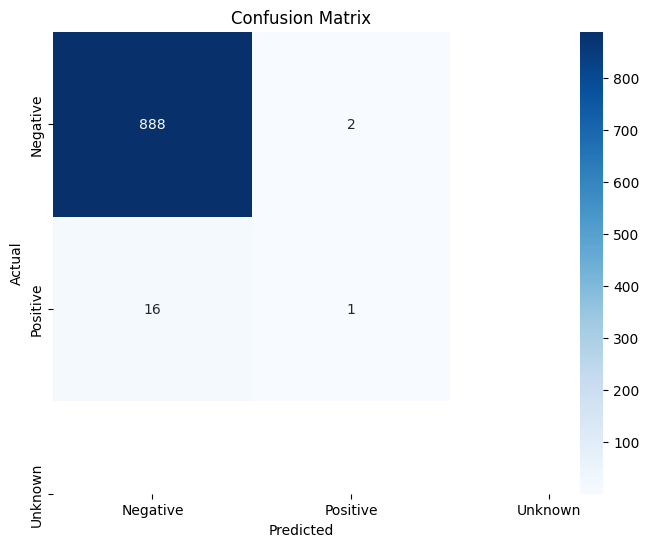

In [55]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns
# Load the dataset
file_path = '/content/drive/MyDrive/chagas/inner_merged_patients_final22.csv'
data = pd.read_csv(file_path)

# Select the features and labels
features = ['786-4', '785-6', '4544-3', '787-2', '718-7', '2951-2', '2160-0',
'789-8', '6768-6', '777-3', '1920-8', '3094-0', '2823-3', '788-0',
'1975-2', '2075-0', '17861-6', '2028-9', '2345-7', '2885-2', '770-8',
'711-2', '742-7', '731-0', '736-9', '5905-5', '706-2', '713-8']
label = 'lab_result_text_val'

# Filter out rows where 'lab_result_text_val' is 'Unknown'
filtered_data = data[data['lab_result_text_val'] != 'Unknown']

# Extract features and labels from the filtered data
X = filtered_data[features]  # Feature data
y = filtered_data[label]     # Label data


# Handle missing values with SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Separate numerical and categorical features
numerical_features = ['786-4', '785-6', '4544-3', '787-2', '718-7', '2951-2', '2160-0',
'789-8', '6768-6', '777-3', '1920-8', '3094-0', '2823-3', '788-0',
'1975-2', '2075-0', '17861-6', '2028-9', '2345-7', '2885-2', '770-8',
'711-2', '742-7', '731-0', '736-9', '5905-5', '706-2', '713-8']


# Normalize the numerical features
scaler = StandardScaler()
X_imputed[numerical_features] = scaler.fit_transform(X_imputed[numerical_features])

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42, stratify=y)

# Oversampling using SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# Check the shape of X_train_resampled and y_train_resampled
print(f"Shape of X_train_resampled: {X_train_resampled.shape}")
print(f"Shape of y_train_resampled: {y_train_resampled.shape}")

# Count the number of 'Positive', 'Negative', and 'Unknown' in y_train_resampled
class_distribution = y_train_resampled.value_counts()

print("Class distribution in y_train_resampled:")
print(class_distribution)

# Train a classifier (Random Forest as an example)
clf = lgb.LGBMClassifier(random_state=42)
clf.fit(X_train_resampled, y_train_resampled)

# Make predictions and evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive', 'Unknown'],
            yticklabels=['Negative', 'Positive', 'Unknown'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Class distribution in y_train_oversampled:
lab_result_text_val
Negative    3558
Positive    3558
Name: count, dtype: int64
[LightGBM] [Info] Number of positive: 3558, number of negative: 3558
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000813 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3685
[LightGBM] [Info] Number of data points in the train set: 7116, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
              precision    recall  f1-score   support

    Negative       0.98     

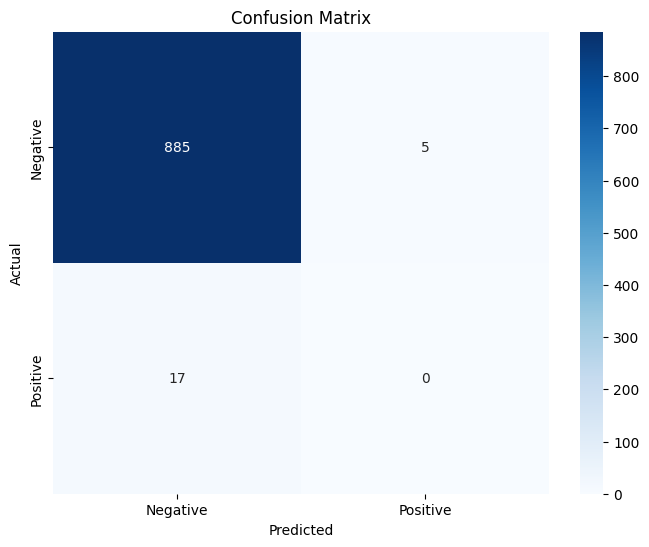

In [59]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/drive/MyDrive/chagas/inner_merged_patients_final22.csv'
data = pd.read_csv(file_path)

# Select the features and labels
features = ['786-4', '785-6', '4544-3', '787-2', '718-7', '2951-2', '2160-0',
            '789-8', '6768-6', '777-3', '1920-8', '3094-0', '2823-3', '788-0',
            '1975-2', '2075-0', '17861-6', '2028-9', '2345-7', '2885-2', '770-8',
            '711-2', '742-7', '731-0', '736-9', '5905-5', '706-2', '713-8']
label = 'lab_result_text_val'

# Filter out rows where 'lab_result_text_val' is 'Unknown'
filtered_data = data[data['lab_result_text_val'] != 'Unknown']

# Extract features and labels from the filtered data
X = filtered_data[features]  # Feature data
y = filtered_data[label]     # Label data

# Handle missing values with SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Separate numerical features
numerical_features = features

# Normalize the numerical features
scaler = StandardScaler()
X_imputed[numerical_features] = scaler.fit_transform(X_imputed[numerical_features])

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42, stratify=y)

# Combine X_train and y_train for easier manipulation
train_data = pd.concat([X_train, y_train], axis=1)

# Separate majority and minority classes
majority_class = train_data[train_data['lab_result_text_val'] == 'Negative']
minority_class = train_data[train_data['lab_result_text_val'] == 'Positive']

# Duplicate the minority class (Positive) to match the size of the majority class (Negative)
minority_oversampled = minority_class.sample(n=len(majority_class), replace=True, random_state=42)

# Combine the oversampled minority class with the majority class
oversampled_train_data = pd.concat([majority_class, minority_oversampled])

# Separate features and target variable again
X_train_oversampled = oversampled_train_data.drop('lab_result_text_val', axis=1)
y_train_oversampled = oversampled_train_data['lab_result_text_val']

# Check the class distribution after oversampling
print("Class distribution in y_train_oversampled:")
print(y_train_oversampled.value_counts())

# Train a classifier (LightGBM as an example)
clf = lgb.LGBMClassifier(random_state=42)
clf.fit(X_train_oversampled, y_train_oversampled)

# Make predictions and evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Class distribution in y_train_downsampled:
lab_result_text_val
Negative    1762
Unknown     1762
Name: count, dtype: int64
[LightGBM] [Info] Number of positive: 1762, number of negative: 1762
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000603 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3945
[LightGBM] [Info] Number of data points in the train set: 3524, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
              precision    recall  f1-score   support

    Negative       0.94      0.91      0.93       890
     Unknown       0.83      0.89      0.86       440

    accuracy                           0.90      1330
   macro avg       0.88      0.90      0.89      1330
weighted avg       0.90      0.90      0.90      1330



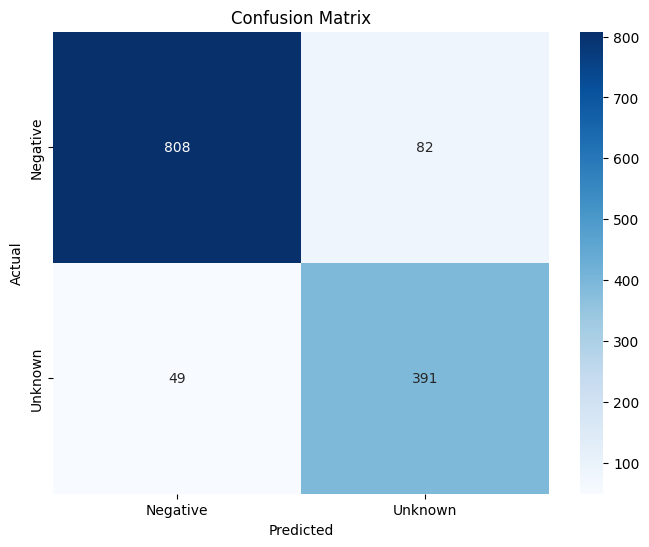

In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/drive/MyDrive/chagas/inner_merged_patients_final22.csv'
data = pd.read_csv(file_path)

# Select the features and labels
features = ['786-4', '785-6', '4544-3', '787-2', '718-7', '2951-2', '2160-0',
            '789-8', '6768-6', '777-3', '1920-8', '3094-0', '2823-3', '788-0',
            '1975-2', '2075-0', '17861-6', '2028-9', '2345-7', '2885-2', '770-8',
            '711-2', '742-7', '731-0', '736-9', '5905-5', '706-2', '713-8']
label = 'lab_result_text_val'

# Filter out rows where 'lab_result_text_val' is 'Unknown'
filtered_data = data[data['lab_result_text_val'] != 'Positive']

# Extract features and labels from the filtered data
X = filtered_data[features]  # Feature data
y = filtered_data[label]     # Label data

# Handle missing values with SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Separate numerical features
numerical_features = features

# Normalize the numerical features
scaler = StandardScaler()
X_imputed[numerical_features] = scaler.fit_transform(X_imputed[numerical_features])

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42, stratify=y)

# Combine X_train and y_train for easier manipulation
train_data = pd.concat([X_train, y_train], axis=1)

# Separate majority and minority classes
majority_class = train_data[train_data['lab_result_text_val'] == 'Negative']
minority_class = train_data[train_data['lab_result_text_val'] == 'Unknown']

# Downsample the majority class to the size of the minority class
majority_downsampled = resample(majority_class,
                                replace=False,  # sample without replacement
                                n_samples=len(minority_class),  # match minority class size
                                random_state=42)  # for reproducibility

# Combine downsampled majority class with minority class
downsampled_train_data = pd.concat([majority_downsampled, minority_class])

# Separate features and target variable again
X_train_downsampled = downsampled_train_data.drop('lab_result_text_val', axis=1)
y_train_downsampled = downsampled_train_data['lab_result_text_val']

# Check the class distribution after downsampling
print("Class distribution in y_train_downsampled:")
print(y_train_downsampled.value_counts())

# Train a classifier (LightGBM as an example)
clf = lgb.LGBMClassifier(random_state=42)
clf.fit(X_train_downsampled, y_train_downsampled)

# Make predictions and evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Unknown'],
            yticklabels=['Negative', 'Unknown'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Class distribution in y_train_downsampled:
lab_result_text_val
Negative    68
Positive    68
Name: count, dtype: int64
[LightGBM] [Info] Number of positive: 68, number of negative: 68
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000086 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 671
[LightGBM] [Info] Number of data points in the train set: 136, number of used features: 28
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[

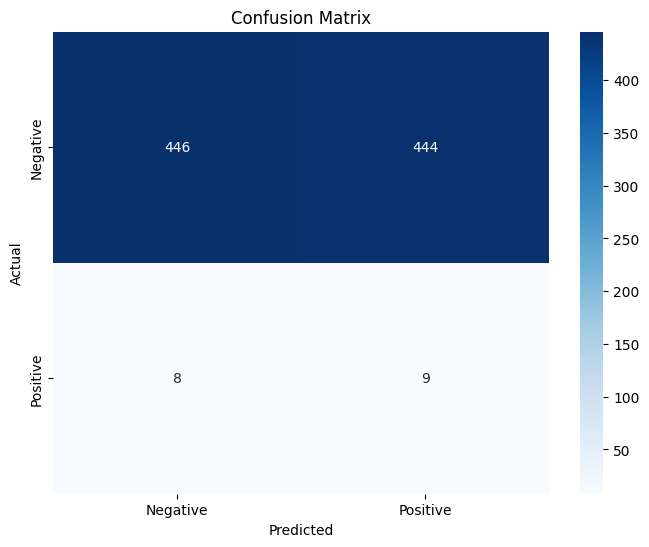

In [58]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/drive/MyDrive/chagas/inner_merged_patients_final22.csv'
data = pd.read_csv(file_path)

# Select the features and labels
features = ['786-4', '785-6', '4544-3', '787-2', '718-7', '2951-2', '2160-0',
            '789-8', '6768-6', '777-3', '1920-8', '3094-0', '2823-3', '788-0',
            '1975-2', '2075-0', '17861-6', '2028-9', '2345-7', '2885-2', '770-8',
            '711-2', '742-7', '731-0', '736-9', '5905-5', '706-2', '713-8']
label = 'lab_result_text_val'

# Filter out rows where 'lab_result_text_val' is 'Unknown'
filtered_data = data[data['lab_result_text_val'] != 'Unknown']

# Extract features and labels from the filtered data
X = filtered_data[features]  # Feature data
y = filtered_data[label]     # Label data

# Handle missing values with SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Separate numerical features
numerical_features = features

# Normalize the numerical features
scaler = StandardScaler()
X_imputed[numerical_features] = scaler.fit_transform(X_imputed[numerical_features])

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42, stratify=y)

# Combine X_train and y_train for easier manipulation
train_data = pd.concat([X_train, y_train], axis=1)

# Separate majority and minority classes
majority_class = train_data[train_data['lab_result_text_val'] == 'Negative']
minority_class = train_data[train_data['lab_result_text_val'] == 'Positive']

# Downsample the majority class to the size of the minority class
majority_downsampled = resample(majority_class,
                                replace=False,  # sample without replacement
                                n_samples=len(minority_class),  # match minority class size
                                random_state=42)  # for reproducibility

# Combine downsampled majority class with minority class
downsampled_train_data = pd.concat([majority_downsampled, minority_class])

# Separate features and target variable again
X_train_downsampled = downsampled_train_data.drop('lab_result_text_val', axis=1)
y_train_downsampled = downsampled_train_data['lab_result_text_val']

# Check the class distribution after downsampling
print("Class distribution in y_train_downsampled:")
print(y_train_downsampled.value_counts())

# Train a classifier (LightGBM as an example)
clf = lgb.LGBMClassifier(random_state=42)
clf.fit(X_train_downsampled, y_train_downsampled)

# Make predictions and evaluate
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'],
            yticklabels=['Negative', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

No missing values in 'lab_result_text_val'.
Unique values in 'lab_result_text_val':
['Negative' 'Positive' 'Unknown']
No NaN values found in 'lab_result_text_val' after concatenation.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.049412 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 4845
[LightGBM] [Info] Number of data points in the train set: 5286, number of used features: 19
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
              precision    recall  f1-score   support

    Negative       0.83      0.84      0.84       890
    Positive       0.00      0.00      0.00        17
     Unknown       0.67      0.69      0.68       440

    accuracy                           0.78      1347
   macro avg       0.50      0.51      0.50      1347
weighted avg       0.77      0.78      0

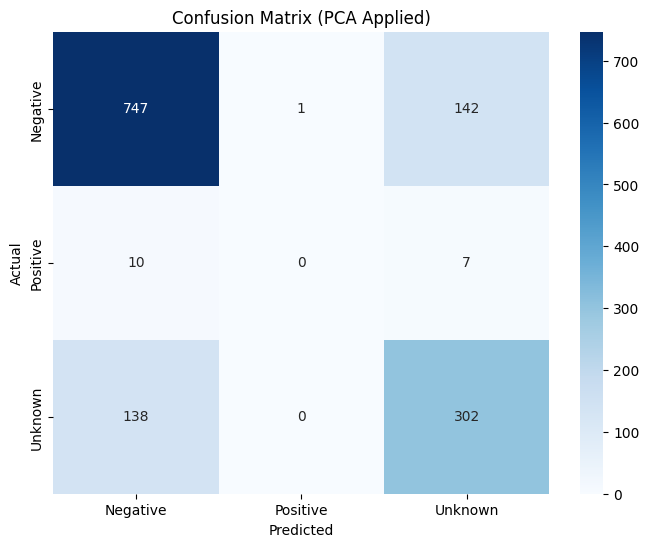

In [20]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.utils import resample
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/drive/MyDrive/chagas/inner_merged_patients_final22.csv'
data = pd.read_csv(file_path)

# Select the features and labels
features = ['786-4', '785-6', '4544-3', '787-2', '718-7', '2951-2', '2160-0',
            '789-8', '6768-6', '777-3', '1920-8', '3094-0', '2823-3', '788-0',
            '1975-2', '2075-0', '17861-6', '2028-9', '2345-7', '2885-2', '770-8',
            '711-2', '742-7', '731-0', '736-9', '5905-5', '706-2', '713-8']
label = 'lab_result_text_val'

# Extract features and labels from the data (keep all three classes)
X = data[features]  # Feature data
y = data[label]     # Label data

# Handle missing values with SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Ensure no NaN values in 'lab_result_text_val'
if y.isnull().values.any():
    print("There are missing values in the 'lab_result_text_val' column. Please check the data.")
else:
    print("No missing values in 'lab_result_text_val'.")

# Check unique values in 'lab_result_text_val' to ensure correct labels
print("Unique values in 'lab_result_text_val':")
print(y.unique())

# Normalize the numerical features
scaler = StandardScaler()
X_imputed[features] = scaler.fit_transform(X_imputed[features])

# Split the data into train and test sets (keeping all three classes)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42, stratify=y)

# Combine X_train and y_train for easier manipulation
train_data = pd.concat([X_train, y_train], axis=1)

# Ensure there are no NaNs in 'lab_result_text_val' in train_data
if train_data['lab_result_text_val'].isnull().values.any():
    print("NaN values found in 'lab_result_text_val' after concatenation. Check your data.")
else:
    print("No NaN values found in 'lab_result_text_val' after concatenation.")

# Separate each class: Positive, Negative, and Unknown
positive_class = train_data[train_data['lab_result_text_val'] == 'Positive']
negative_class = train_data[train_data['lab_result_text_val'] == 'Negative']
unknown_class = train_data[train_data['lab_result_text_val'] == 'Unknown']

# Downsample or balance each class
# For this example, I will downsample the majority class (Negative) and upsample the minority classes (Positive, Unknown)

# Downsample the majority class to the size of the minority class
max_class_size = max(len(positive_class), len(unknown_class))

# Downsample negative class
negative_downsampled = resample(negative_class,
                                replace=False,  # sample without replacement
                                n_samples=max_class_size,  # match minority class size
                                random_state=42)  # for reproducibility

# Upsample positive and unknown classes (if needed)
positive_upsampled = resample(positive_class,
                              replace=True,  # sample with replacement
                              n_samples=max_class_size,  # match majority class size
                              random_state=42)  # for reproducibility

unknown_upsampled = resample(unknown_class,
                             replace=True,  # sample with replacement
                             n_samples=max_class_size,  # match majority class size
                             random_state=42)  # for reproducibility

# Combine all three balanced classes
balanced_train_data = pd.concat([negative_downsampled, positive_upsampled, unknown_upsampled])

# Separate features and target variable again
X_train_balanced = balanced_train_data.drop('lab_result_text_val', axis=1)
y_train_balanced = balanced_train_data['lab_result_text_val']

# Apply PCA to reduce dimensionality
pca = PCA(n_components=0.95)  # Keep 95% of the variance
X_train_pca = pca.fit_transform(X_train_balanced)
X_test_pca = pca.transform(X_test)

# Train a classifier (LightGBM as an example) on the PCA-reduced data
clf_pca = lgb.LGBMClassifier(random_state=42)
clf_pca.fit(X_train_pca, y_train_balanced)

# Make predictions and evaluate
y_pred_pca = clf_pca.predict(X_test_pca)
print(classification_report(y_test, y_pred_pca))

# Confusion Matrix
cm_pca = confusion_matrix(y_test, y_pred_pca)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_pca, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive', 'Unknown'],
            yticklabels=['Negative', 'Positive', 'Unknown'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (PCA Applied)')
plt.show()

No missing values in 'lab_result_text_val'.
Unique values in 'lab_result_text_val':
['Negative' 'Positive' 'Unknown']
No NaN values found in 'lab_result_text_val' after concatenation.
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001678 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 10674, number of used features: 20
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
              precision    recall  f1-score   support

    Negative       0.84      0.81      0.82       890
    Positive       0.00      0.00      0.00        17
     Unknown       0.63      0.69      0.66       440

    accuracy                           0.76      1347
   macro avg       0.49      0.50      0.49      1347
weighted avg       0.76      0.76      

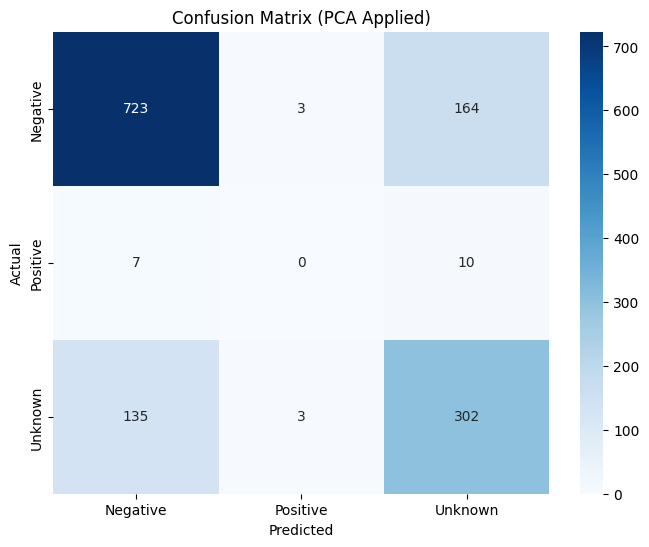

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.utils import resample
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/drive/MyDrive/chagas/inner_merged_patients_final22.csv'
data = pd.read_csv(file_path)

# Select the features and labels
features = ['786-4', '785-6', '4544-3', '787-2', '718-7', '2951-2', '2160-0',
            '789-8', '6768-6', '777-3', '1920-8', '3094-0', '2823-3', '788-0',
            '1975-2', '2075-0', '17861-6', '2028-9', '2345-7', '2885-2', '770-8',
            '711-2', '742-7', '731-0', '736-9', '5905-5', '706-2', '713-8']
label = 'lab_result_text_val'

# Extract features and labels from the data (keep all three classes)
X = data[features]  # Feature data
y = data[label]     # Label data

# Handle missing values with SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Ensure no NaN values in 'lab_result_text_val'
if y.isnull().values.any():
    print("There are missing values in the 'lab_result_text_val' column. Please check the data.")
else:
    print("No missing values in 'lab_result_text_val'.")

# Check unique values in 'lab_result_text_val' to ensure correct labels
print("Unique values in 'lab_result_text_val':")
print(y.unique())

# Normalize the numerical features
scaler = StandardScaler()
X_imputed[features] = scaler.fit_transform(X_imputed[features])

# Split the data into train and test sets (keeping all three classes)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42, stratify=y)

# Combine X_train and y_train for easier manipulation
train_data = pd.concat([X_train, y_train], axis=1)

# Ensure there are no NaNs in 'lab_result_text_val' in train_data
if train_data['lab_result_text_val'].isnull().values.any():
    print("NaN values found in 'lab_result_text_val' after concatenation. Check your data.")
else:
    print("No NaN values found in 'lab_result_text_val' after concatenation.")

# Separate each class: Positive, Negative, and Unknown
positive_class = train_data[train_data['lab_result_text_val'] == 'Positive']
negative_class = train_data[train_data['lab_result_text_val'] == 'Negative']
unknown_class = train_data[train_data['lab_result_text_val'] == 'Unknown']

# Find the maximum class size (majority class)
max_class_size = max(len(positive_class), len(negative_class), len(unknown_class))

# Oversample the minority classes to match the size of the majority class
positive_upsampled = resample(positive_class,
                              replace=True,  # sample with replacement
                              n_samples=max_class_size,  # match majority class size
                              random_state=42)  # for reproducibility

negative_upsampled = resample(negative_class,
                              replace=True,  # sample with replacement
                              n_samples=max_class_size,  # match majority class size
                              random_state=42)  # for reproducibility

unknown_upsampled = resample(unknown_class,
                             replace=True,  # sample with replacement
                             n_samples=max_class_size,  # match majority class size
                             random_state=42)  # for reproducibility

# Combine all three oversampled classes
oversampled_train_data = pd.concat([positive_upsampled, negative_upsampled, unknown_upsampled])

# Separate features and target variable again
X_train_oversampled = oversampled_train_data.drop('lab_result_text_val', axis=1)
y_train_oversampled = oversampled_train_data['lab_result_text_val']

# Apply PCA to reduce dimensionality
pca = PCA(n_components=0.95)  # Keep 95% of the variance
X_train_pca = pca.fit_transform(X_train_oversampled)
X_test_pca = pca.transform(X_test)

# Train a classifier (LightGBM as an example) on the PCA-reduced data
clf_pca = lgb.LGBMClassifier(random_state=42)
clf_pca.fit(X_train_pca, y_train_oversampled)

# Make predictions and evaluate
y_pred_pca = clf_pca.predict(X_test_pca)
print(classification_report(y_test, y_pred_pca))

# Confusion Matrix
cm_pca = confusion_matrix(y_test, y_pred_pca)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_pca, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive', 'Unknown'],
            yticklabels=['Negative', 'Positive', 'Unknown'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (PCA Applied)')
plt.show()

No missing values in 'lab_result_text_val'.
Unique values in 'lab_result_text_val':
['Negative' 'Positive' 'Unknown']
No NaN values found in 'lab_result_text_val' after concatenation.
              precision    recall  f1-score   support

    Negative       0.84      0.82      0.83       890
    Positive       0.00      0.00      0.00        17
     Unknown       0.65      0.70      0.67       440

    accuracy                           0.77      1347
   macro avg       0.49      0.51      0.50      1347
weighted avg       0.76      0.77      0.77      1347



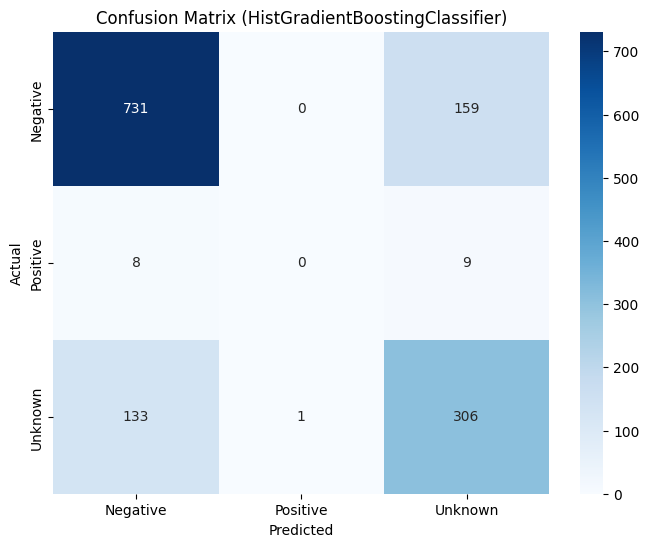

In [22]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.utils import resample
from sklearn.decomposition import PCA
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import HistGradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/drive/MyDrive/chagas/inner_merged_patients_final22.csv'
data = pd.read_csv(file_path)

# Select the features and labels
features = ['786-4', '785-6', '4544-3', '787-2', '718-7', '2951-2', '2160-0',
            '789-8', '6768-6', '777-3', '1920-8', '3094-0', '2823-3', '788-0',
            '1975-2', '2075-0', '17861-6', '2028-9', '2345-7', '2885-2', '770-8',
            '711-2', '742-7', '731-0', '736-9', '5905-5', '706-2', '713-8']
label = 'lab_result_text_val'

# Extract features and labels from the data (keep all three classes)
X = data[features]  # Feature data
y = data[label]     # Label data

# Handle missing values with SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Ensure no NaN values in 'lab_result_text_val'
if y.isnull().values.any():
    print("There are missing values in the 'lab_result_text_val' column. Please check the data.")
else:
    print("No missing values in 'lab_result_text_val'.")

# Check unique values in 'lab_result_text_val' to ensure correct labels
print("Unique values in 'lab_result_text_val':")
print(y.unique())

# Normalize the numerical features
scaler = StandardScaler()
X_imputed[features] = scaler.fit_transform(X_imputed[features])

# Split the data into train and test sets (keeping all three classes)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42, stratify=y)

# Combine X_train and y_train for easier manipulation
train_data = pd.concat([X_train, y_train], axis=1)

# Ensure there are no NaNs in 'lab_result_text_val' in train_data
if train_data['lab_result_text_val'].isnull().values.any():
    print("NaN values found in 'lab_result_text_val' after concatenation. Check your data.")
else:
    print("No NaN values found in 'lab_result_text_val' after concatenation.")

# Separate each class: Positive, Negative, and Unknown
positive_class = train_data[train_data['lab_result_text_val'] == 'Positive']
negative_class = train_data[train_data['lab_result_text_val'] == 'Negative']
unknown_class = train_data[train_data['lab_result_text_val'] == 'Unknown']

# Find the maximum class size (majority class)
max_class_size = max(len(positive_class), len(negative_class), len(unknown_class))

# Oversample the minority classes to match the size of the majority class
positive_upsampled = resample(positive_class,
                              replace=True,  # sample with replacement
                              n_samples=max_class_size,  # match majority class size
                              random_state=42)  # for reproducibility

negative_upsampled = resample(negative_class,
                              replace=True,  # sample with replacement
                              n_samples=max_class_size,  # match majority class size
                              random_state=42)  # for reproducibility

unknown_upsampled = resample(unknown_class,
                             replace=True,  # sample with replacement
                             n_samples=max_class_size,  # match majority class size
                             random_state=42)  # for reproducibility

# Combine all three oversampled classes
oversampled_train_data = pd.concat([positive_upsampled, negative_upsampled, unknown_upsampled])

# Separate features and target variable again
X_train_oversampled = oversampled_train_data.drop('lab_result_text_val', axis=1)
y_train_oversampled = oversampled_train_data['lab_result_text_val']

# Apply PCA to reduce dimensionality
pca = PCA(n_components=0.95)  # Keep 95% of the variance
X_train_pca = pca.fit_transform(X_train_oversampled)
X_test_pca = pca.transform(X_test)

# Train a classifier (HistGradientBoostingClassifier as an example) on the PCA-reduced data
clf_histgb = HistGradientBoostingClassifier(random_state=42)
clf_histgb.fit(X_train_pca, y_train_oversampled)

# Make predictions and evaluate
y_pred_histgb = clf_histgb.predict(X_test_pca)
print(classification_report(y_test, y_pred_histgb))

# Confusion Matrix
cm_histgb = confusion_matrix(y_test, y_pred_histgb)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_histgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive', 'Unknown'],
            yticklabels=['Negative', 'Positive', 'Unknown'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (HistGradientBoostingClassifier)')
plt.show()

No missing values in 'lab_result_text_val'.
Unique values in 'lab_result_text_val':
['Negative' 'Positive' 'Unknown']
No NaN values found in 'lab_result_text_val' after concatenation.


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

    Negative       0.94      0.92      0.93       890
    Positive       0.00      0.00      0.00        17
     Unknown       0.84      0.90      0.87       440

    accuracy                           0.90      1347
   macro avg       0.59      0.61      0.60      1347
weighted avg       0.90      0.90      0.90      1347



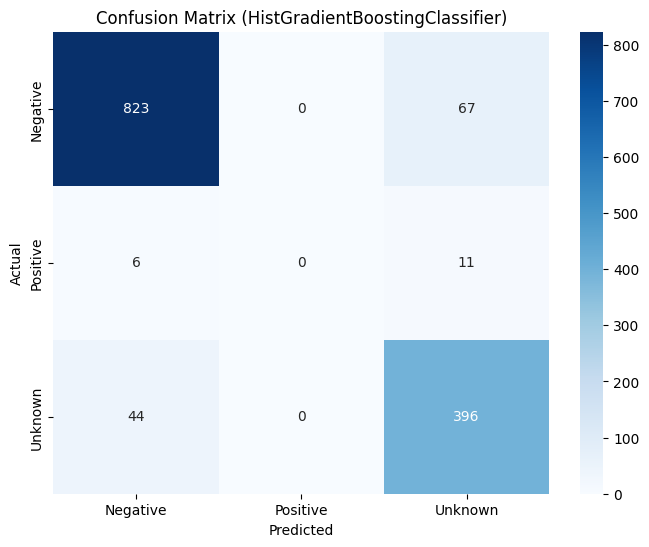

In [23]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.utils import resample
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import HistGradientBoostingClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = '/content/drive/MyDrive/chagas/inner_merged_patients_final22.csv'
data = pd.read_csv(file_path)

# Select the features and labels
features = ['786-4', '785-6', '4544-3', '787-2', '718-7', '2951-2', '2160-0',
            '789-8', '6768-6', '777-3', '1920-8', '3094-0', '2823-3', '788-0',
            '1975-2', '2075-0', '17861-6', '2028-9', '2345-7', '2885-2', '770-8',
            '711-2', '742-7', '731-0', '736-9', '5905-5', '706-2', '713-8']
label = 'lab_result_text_val'

# Extract features and labels from the data (keep all three classes)
X = data[features]  # Feature data
y = data[label]     # Label data

# Handle missing values with SimpleImputer
imputer = SimpleImputer(strategy='most_frequent')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Ensure no NaN values in 'lab_result_text_val'
if y.isnull().values.any():
    print("There are missing values in the 'lab_result_text_val' column. Please check the data.")
else:
    print("No missing values in 'lab_result_text_val'.")

# Check unique values in 'lab_result_text_val' to ensure correct labels
print("Unique values in 'lab_result_text_val':")
print(y.unique())

# Normalize the numerical features
scaler = StandardScaler()
X_imputed[features] = scaler.fit_transform(X_imputed[features])

# Split the data into train and test sets (keeping all three classes)
X_train, X_test, y_train, y_test = train_test_split(X_imputed, y, test_size=0.2, random_state=42, stratify=y)

# Combine X_train and y_train for easier manipulation
train_data = pd.concat([X_train, y_train], axis=1)

# Ensure there are no NaNs in 'lab_result_text_val' in train_data
if train_data['lab_result_text_val'].isnull().values.any():
    print("NaN values found in 'lab_result_text_val' after concatenation. Check your data.")
else:
    print("No NaN values found in 'lab_result_text_val' after concatenation.")

# Separate each class: Positive, Negative, and Unknown
positive_class = train_data[train_data['lab_result_text_val'] == 'Positive']
negative_class = train_data[train_data['lab_result_text_val'] == 'Negative']
unknown_class = train_data[train_data['lab_result_text_val'] == 'Unknown']

# Find the maximum class size (majority class)
max_class_size = max(len(positive_class), len(negative_class), len(unknown_class))

# Oversample the minority classes to match the size of the majority class
positive_upsampled = resample(positive_class,
                              replace=True,  # sample with replacement
                              n_samples=max_class_size,  # match majority class size
                              random_state=42)  # for reproducibility

negative_upsampled = resample(negative_class,
                              replace=True,  # sample with replacement
                              n_samples=max_class_size,  # match majority class size
                              random_state=42)  # for reproducibility

unknown_upsampled = resample(unknown_class,
                             replace=True,  # sample with replacement
                             n_samples=max_class_size,  # match majority class size
                             random_state=42)  # for reproducibility

# Combine all three oversampled classes
oversampled_train_data = pd.concat([positive_upsampled, negative_upsampled, unknown_upsampled])

# Separate features and target variable again
X_train_oversampled = oversampled_train_data.drop('lab_result_text_val', axis=1)
y_train_oversampled = oversampled_train_data['lab_result_text_val']

# Train a classifier (HistGradientBoostingClassifier as an example) on the oversampled data
clf_histgb = HistGradientBoostingClassifier(random_state=42)
clf_histgb.fit(X_train_oversampled, y_train_oversampled)

# Make predictions and evaluate
y_pred_histgb = clf_histgb.predict(X_test)
print(classification_report(y_test, y_pred_histgb))

# Confusion Matrix
cm_histgb = confusion_matrix(y_test, y_pred_histgb)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_histgb, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive', 'Unknown'],
            yticklabels=['Negative', 'Positive', 'Unknown'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (HistGradientBoostingClassifier)')
plt.show()

In [24]:
import numpy as np
import pandas as pd

# Load the dataset (use the imputed version)
file_path = '/content/drive/MyDrive/chagas/inner_merged_patients_final22.csv'
data = pd.read_csv(file_path)

# Select the features and labels
features = ['786-4', '785-6', '4544-3', '787-2', '718-7', '2951-2', '2160-0',
            '789-8', '6768-6', '777-3', '1920-8', '3094-0', '2823-3', '788-0',
            '1975-2', '2075-0', '17861-6', '2028-9', '2345-7', '2885-2', '770-8',
            '711-2', '742-7', '731-0', '736-9', '5905-5', '706-2', '713-8']

# Calculate IQR for each numerical feature and detect outliers
outliers = pd.DataFrame()

for feature in features:
    Q1 = data[feature].quantile(0.25)  # First quartile (25th percentile)
    Q3 = data[feature].quantile(0.75)  # Third quartile (75th percentile)
    IQR = Q3 - Q1                      # Interquartile Range

    # Define outlier bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Detect outliers
    feature_outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]

    # Append outliers to the dataframe
    outliers = pd.concat([outliers, feature_outliers])

# Remove duplicates (some outliers might appear in more than one feature)
outliers = outliers.drop_duplicates()

# Output the outliers and their count
print(f"Total number of outliers detected: {outliers.shape[0]}")
print("Outliers detected in the dataset:")
print(outliers)

Total number of outliers detected: 3605
Outliers detected in the dataset:
     patient_id  786-4  785-6  4544-3  787-2  718-7  2951-2  2160-0  789-8  \
66         AB4H   29.0   27.5    36.6   94.8   10.6   138.0    2.10   3.86   
180        ABFD   37.5   31.6    23.2   84.4    8.7   139.0    0.70   2.75   
232        ABKE   29.2   24.2    32.2   82.8    9.4   137.0    1.40   3.89   
247        ABLK   29.3   27.7    24.2   94.5    7.1   137.0    0.70   2.56   
254        ABMG   37.5   54.1    28.0  144.3   10.5   140.0    0.80   1.94   
...         ...    ...    ...     ...    ...    ...     ...     ...    ...   
6369       SxuB   30.6   27.0    38.6   88.3   11.8   140.0    0.80   4.37   
6385       SxyF   31.0   26.4    46.1   85.2   14.3   137.0    0.99   5.41   
6443        zAH   32.9   30.7    38.3   93.4   12.6   137.0    0.87   4.10   
6615       zgTL   35.9   34.5    40.7   96.2   14.6   141.0    0.73   4.23   
6712        zwi   33.4   32.0    46.1   95.6   15.4   137.0    1.94 

In [35]:
"""import pandas as pd

# Load the dataset
file_path = '/content/drive/MyDrive/chagas/lab_positive_all_codes.csv'
data = pd.read_csv(file_path)

# Convert the 'date' column to datetime format for proper sorting
data['date'] = pd.to_datetime(data['date'], errors='coerce')

# Remove duplicates on the basis of 'patient_id' and 'code', keeping the one with the latest 'date'
cleaned_data = data.sort_values(by='date', ascending=False).drop_duplicates(subset=['patient_id', 'code'], keep='first')

# Count the number of patients per code
code_patient_count = cleaned_data.groupby('code')['patient_id'].nunique()

# Sort the codes by the number of patients in descending order
sorted_code_patient_count = code_patient_count.sort_values(ascending=False)

# Print the sorted result
print("Code occurrence in patients, sorted by frequency:")
print(sorted_code_patient_count)

# Optionally, save the sorted result to a new file
output_file_path = '/content/drive/MyDrive/chagas/sorted_code_patient_count.csv'
sorted_code_patient_count.to_csv(output_file_path, header=True)

print(f"Sorted code occurrence saved to: {output_file_path}")"""

'import pandas as pd\n\n# Load the dataset\nfile_path = \'/content/drive/MyDrive/chagas/lab_positive_all_codes.csv\'\ndata = pd.read_csv(file_path)\n\n# Convert the \'date\' column to datetime format for proper sorting\ndata[\'date\'] = pd.to_datetime(data[\'date\'], errors=\'coerce\')\n\n# Remove duplicates on the basis of \'patient_id\' and \'code\', keeping the one with the latest \'date\'\ncleaned_data = data.sort_values(by=\'date\', ascending=False).drop_duplicates(subset=[\'patient_id\', \'code\'], keep=\'first\')\n\n# Count the number of patients per code\ncode_patient_count = cleaned_data.groupby(\'code\')[\'patient_id\'].nunique()\n\n# Sort the codes by the number of patients in descending order\nsorted_code_patient_count = code_patient_count.sort_values(ascending=False)\n\n# Print the sorted result\nprint("Code occurrence in patients, sorted by frequency:")\nprint(sorted_code_patient_count)\n\n# Optionally, save the sorted result to a new file\noutput_file_path = \'/content/d